# Exploratory Data Analysis (EDA) on Retail Sales Data

### Internship Project Report

This project focuses on performing Exploratory Data Analysis (EDA) on a retail sales dataset 
to uncover meaningful patterns, trends, and insights that can help businesses make 
data-driven decisions.


## Project Objectives

- Understand the structure and quality of the retail sales dataset
- Perform data cleaning and preprocessing
- Analyze sales trends over time
- Study customer demographics and purchasing behavior
- Analyze product-level performance
- Visualize insights using charts and heatmaps
- Provide actionable business recommendations


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('default')

In [4]:
df = pd.read_csv("C:/Users/agast/Downloads/retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.shape

(1000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


# DATA CLEANING 

### Data Cleaning and Pre-processing

In [7]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [10]:
df.mean(numeric_only=True)

Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

In [11]:
df.median(numeric_only=True)

Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

# Time-Series Analysis

### Analyzing sales over time helps identify trends, seasonality, and peak business periods.


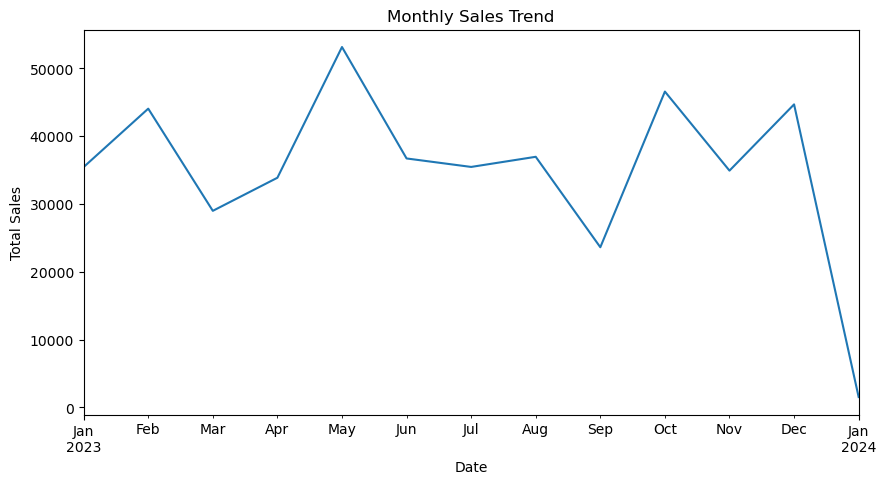

In [12]:
df['Date']=pd.to_datetime(df['Date'])

monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()
monthly_sales = monthly_sales.to_timestamp()

monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# Customer Analysis

### This section analyzes customer behavior based on demographic attributes such as gender and purchasing patterns.

### Gender Analysis

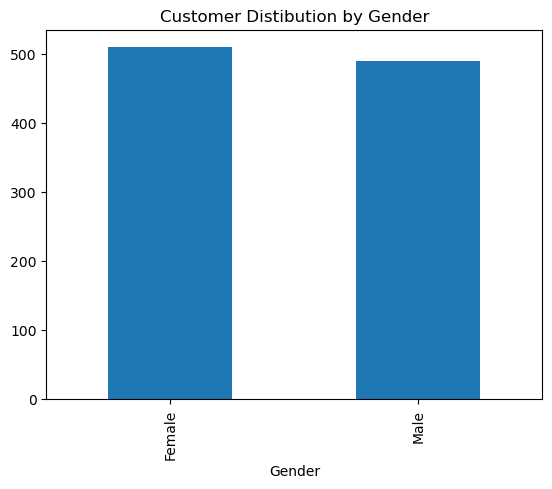

In [13]:
df['Gender'].value_counts().plot(kind='bar')
plt.title("Customer Distibution by Gender")
plt.show()

# Product Analysis
### Understanding product-level performance helps in inventory planning and marketing strategy.

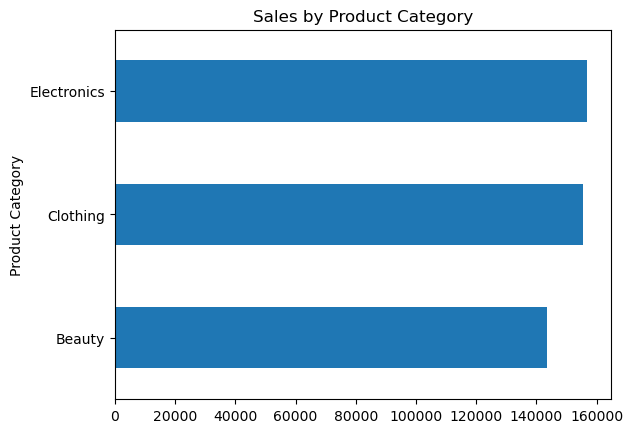

In [15]:
df.groupby('Product Category')['Total Amount'].sum().sort_values().plot(kind='barh')
plt.title("Sales by Product Category")
plt.show()

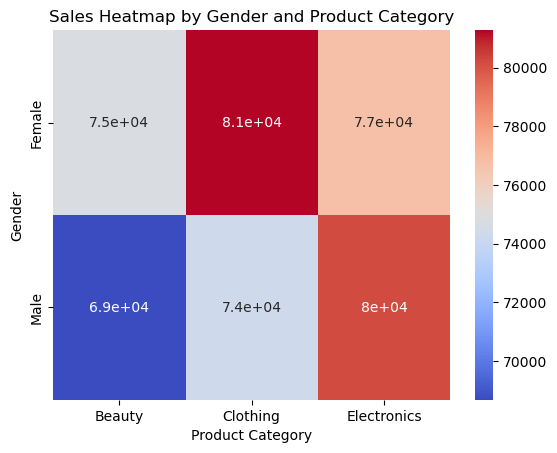

In [16]:
pivot = pd.pivot_table(
    df,
    values='Total Amount',
    index='Gender',
    columns='Product Category',
    aggfunc='sum'
)

sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Sales Heatmap by Gender and Product Category")
plt.show()

## Key Insights from the Analysis

After exploring and visualizing the retail sales dataset, several important patterns and observations emerged:

- Sales are not evenly distributed across product categories. A few categories contribute a major share of total revenue, indicating that customer demand is concentrated rather than uniform.

- The monthly sales trend shows noticeable fluctuations over time. Certain months consistently record higher sales, suggesting the presence of seasonal demand or promotional effects.

- Customer demographics influence purchasing behavior. One gender segment shows relatively higher contribution to total sales, which can be useful for targeted marketing strategies.

- The heatmap analysis highlights that some product categories perform particularly well within specific customer groups, indicating opportunities for personalized offers and focused advertising.

Overall, these insights help in understanding *what sells more, when it sells more, and who is more likely to buy*.


## Business Recommendations

Based on the insights derived from the exploratory data analysis, the following practical recommendations can be made:

- High-performing product categories should be prioritized in inventory planning to avoid stock shortages and maximize revenue during peak demand periods.

- Marketing campaigns can be better optimized by focusing on customer segments that contribute more to overall sales, rather than applying uniform strategies to all customers.

- Seasonal sales patterns suggest that promotional offers and discounts can be planned strategically during low-sales months to stabilize revenue.

- Historical sales trends should be used as a reference for demand forecasting, which can help reduce excess inventory and improve operational efficiency.

Implementing these recommendations can help the business make more informed, data-driven decisions and improve overall performance.


## Conclusion

This project focused on performing Exploratory Data Analysis on a retail sales dataset to better understand sales trends, customer behavior, and product performance.

Through data cleaning, descriptive statistics, time series analysis, and visual exploration, meaningful insights were obtained that highlight key drivers of sales and areas of improvement. The analysis demonstrates how raw data can be transformed into useful business insights using Python and data visualization techniques.

Overall, this EDA helped strengthen my understanding of real-world data analysis and its role in supporting business decisions.
